<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/InClass/RodiatAyindeSGD_10_18_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
a = 0.989087899
b = 98.082439

In [91]:
print("y = {0} *x + {1}".format(a, b))

y = 0.989087899 *x + 98.082439


In [92]:
print("y = {0:.3f} *x + {1:.1f}".format(a, b))

y = 0.989 *x + 98.1


In [93]:
#Gradient Descent

In [94]:
import pandas as pd
import numpy as np
import pylab as plt
from mpl_toolkits import mplot3d

In [95]:
wbdat = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/wbank_US_leb.csv")

In [96]:
wbdat.head()


,year,leb
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854


In [97]:
wbdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   leb     60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


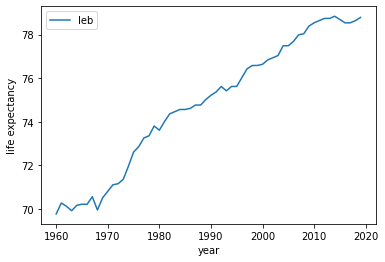

In [98]:
wbdat.plot("year", "leb")
plt.ylabel("life expectancy");

In [99]:
def sumsqerr (Y_obs, Y_pred):
  return ((Y_obs - Y_pred)**2)

In [100]:
# -- extract the X and Y variables into separate arrays
X = wbdat["year"].values
Y = wbdat["leb"].values
# -- set the initial values for slope and intercept
slope = [0.1]
intercept = [-250]
# -- set the learning rate (step size)
Lrate = 1e-9
# -- set the number of iterations to perform gradient descent
epochs = 20
# -- create a list to use for saving SSE values
Y_pred = slope[-1] * X + intercept[-1]
sse = [sumsqerr(Y, Y_pred)]
# -- perform Gradient Descent
for i in range(epochs):
  # -- calculate the gradients for slope and intercept
  D_m = -2 * sum(X * (Y - Y_pred))  # Derivative wrt slope
  D_c = -2 * sum(Y - Y_pred)  # Derivative wrt intercept
  # -- calculate and update the new slope and intercept
  slope.append(slope[-1] - Lrate * D_m)
  intercept.append(intercept[-1] - Lrate * D_c)
  # -- calculate the new predicted value of Y
  Y_pred = slope[-1] * X + intercept[-1]
  # -- calculate and add the new SSE to list
  sse.append(sumsqerr(Y, Y_pred))

In [101]:
print("The final model for predicting life expectancy is")
print("leb = {0:.3f}*year + {1:.1f}".format(slope[-1], intercept[-1]))

The final model for predicting life expectancy is
leb = 0.163*year + -250.0


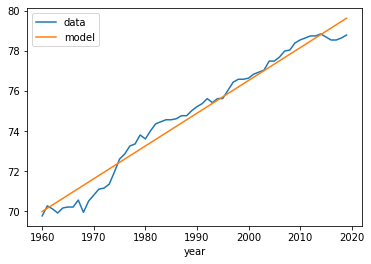

In [102]:
ax = wbdat.plot("year", "leb" , label = "data")
x= np.arange(1960, 2020, 1)
y = slope[-1] * x + intercept[-1]
ax.plot(x, y, label = "model")
ax.legend();

In [ ]:
r2 = 

In [103]:
slope


[0.1,
 0.1300494933902439,
 0.14582519675815392,
 0.15410729368140766,
 0.15845531721143294,
 0.160737988954223,
 0.16193637029908148,
 0.16256550931228833,
 0.1628958014180963,
 0.1630692016887472,
 0.163160235211309,
 0.16320802696042871,
 0.16323311718236905,
 0.1632462893145723,
 0.16325320456097844,
 0.16325683500078034,
 0.16325874094779508,
 0.16325974155220332,
 0.163260266860199,
 0.1632605426420174,
 0.16326068742492328]

In [104]:
intercept

[-250,
 -249.99998489721463,
 -249.99997696844713,
 -249.999972805972,
 -249.9999706207652,
 -249.99996947360577,
 -249.99996887141157,
 -249.999968555319,
 -249.9999683894271,
 -249.99996830238916,
 -249.99996825674882,
 -249.9999682328418,
 -249.9999682203446,
 -249.99996821383746,
 -249.99996821047503,
 -249.99996820876353,
 -249.99996820791878,
 -249.99996820752904,
 -249.99996820737817,
 -249.99996820735274,
 -249.99996820739312]

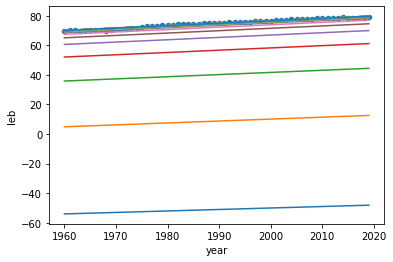

In [105]:
ax = wbdat.plot("year", "leb", kind = "scatter")
x = np.arange(1960, 2020, 1)
for a, b in zip(slope, intercept):
 y = a*x + b 
 ax.plot(x, y)

In [106]:
for i in range(epochs):
 D_m = -2 * sum (X * (Y-Y_pred))
 D_c = -2 * sum (Y-Y_pred)

In [107]:
slope.append(slope[-1]- Lrate*D_m)
intercept.append(intercept[-1] - Lrate*D_c)

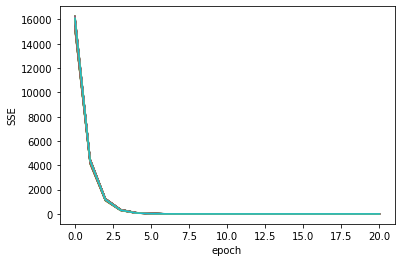

In [108]:
plt.plot(sse)
plt.xlabel("epoch")
plt.ylabel("SSE");

ValueError: ignored

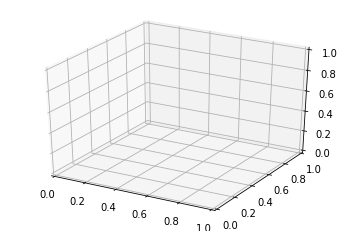

In [109]:
# -- plot the SSE surface and the gradient descent’s search for best slope and intercept

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot(slope, intercept, sse)
ax.plot(slope, intercept, sse, 'o')
ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("SSE")

def error(X, Y, THETA):
    Y_pred = THETA[1]*X + THETA[0]
    return np.sum((Y_pred - Y)**2)
ms = np.linspace(0.09, 0.24, 40)
bs = np.linspace(-255, -245, 60)
M, B = np.meshgrid(ms, bs)
zs = np.array([error(X, Y, theta)
               for theta in zip(np.ravel(B), np.ravel(M))])
Z = zs.reshape(M.shape)
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
fig.tight_layout()
plt.show()